In [25]:
!pip install sastrawi
!pip install nltk
!pip install wordcloud

# Import library
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
import csv
from io import StringIO

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Bidirectional, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import joblib  # Untuk menyimpan model
from scipy.stats import uniform

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
df = pd.read_csv('/content/kecanduan_judi_online.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1906029662490570934,Sat Apr 05 19:56:41 +0000 2025,0,@tomysahara Untuk berhenti judi online bagi yang kecanduan: akui masalahnya cari bantuan profesional seperti hotline 119 (ekstensi 8/9) atau Gamblers Anonymous online blokir akses situs judi ganti dengan hobi positif dan minta dukungan keluarga. Sabar karena pemulihan butuh waktu.,1908609760481378733,NaN,tomysahara,in,NaN,0,0,0,https://x.com/undefined/status/1908609760481378733,1720665183188922368,NaN
1,1908574222735299002,Sat Apr 05 17:38:28 +0000 2025,0,@airamxll Judi online susah diberantas di Indonesia karena teknologi sulit dikontrol (situs baru terus muncul VPN dipakai) hukum belum cukup kuat untuk platform luar negeri dan faktor sosial-ekonomi seperti kemiskinan serta kecanduan mendorong orang berjudi. Budaya dan agama yang https://t.co/1XV4Agl9uy,1908574977252524445,https://pbs.twimg.com/media/Gmq59kbaMAAmRX2.jpg,airamxll,in,NaN,0,0,0,https://x.com/undefined/status/1908574977252524445,1720665183188922368,NaN
2,1908370767055872159,Sat Apr 05 17:15:07 +0000 2025,63,@bpriamboro20 @gcpsrnm @tempodotco @bpriamboro20 Menurutku yang main judi online bisa jadi pelaku sekaligus korban. Di Indonesia mereka pelaku karena melanggar hukum tapi juga korban karena kecanduan dan eksploitasi. Di Kamboja kalau asing legal tapi banyak jadi korban trafficking. Kalau harus pilih satu,1908569099862499592,NaN,bpriamboro20,in,NaN,0,2,2,https://x.com/undefined/status/1908569099862499592,1720665183188922368,NaN
3,1908491543612408109,Sat Apr 05 12:06:56 +0000 2025,0,Kalau udah kecanduan judi online susah balik. Lebih baik cegah dari sekarang. #StopSebelumTerlambat #AntiJudi https://t.co/ScEDbyGvGb,1908491543612408109,https://pbs.twimg.com/media/GnxS8epbcAAqnYK.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/1908491543612408109,1387238937165324289,NaN
4,1908320694733332610,Sat Apr 05 00:48:03 +0000 2025,1,Indonesia darurat judi online (judol) jaga dan awasi keluarga dari penyakit jiwa yang dapat membuat pelakunya menjadi kecanduan. https://t.co/7G0woVwdIs,1908320694733332610,https://pbs.twimg.com/media/Gnu2PlnaAAAiS2p.png,NaN,in,NaN,0,1,0,https://x.com/undefined/status/1908320694733332610,51387306,NaN


In [59]:
df.drop(columns=["image_url", "in_reply_to_screen_name", "location", "username"], inplace=True)
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str
0,1906029662490570934,Sat Apr 05 19:56:41 +0000 2025,0,@tomysahara Untuk berhenti judi online bagi yang kecanduan: akui masalahnya cari bantuan profesional seperti hotline 119 (ekstensi 8/9) atau Gamblers Anonymous online blokir akses situs judi ganti dengan hobi positif dan minta dukungan keluarga. Sabar karena pemulihan butuh waktu.,1908609760481378733,in,0,0,0,https://x.com/undefined/status/1908609760481378733,1720665183188922368
1,1908574222735299002,Sat Apr 05 17:38:28 +0000 2025,0,@airamxll Judi online susah diberantas di Indonesia karena teknologi sulit dikontrol (situs baru terus muncul VPN dipakai) hukum belum cukup kuat untuk platform luar negeri dan faktor sosial-ekonomi seperti kemiskinan serta kecanduan mendorong orang berjudi. Budaya dan agama yang https://t.co/1XV4Agl9uy,1908574977252524445,in,0,0,0,https://x.com/undefined/status/1908574977252524445,1720665183188922368
2,1908370767055872159,Sat Apr 05 17:15:07 +0000 2025,63,@bpriamboro20 @gcpsrnm @tempodotco @bpriamboro20 Menurutku yang main judi online bisa jadi pelaku sekaligus korban. Di Indonesia mereka pelaku karena melanggar hukum tapi juga korban karena kecanduan dan eksploitasi. Di Kamboja kalau asing legal tapi banyak jadi korban trafficking. Kalau harus pilih satu,1908569099862499592,in,0,2,2,https://x.com/undefined/status/1908569099862499592,1720665183188922368
3,1908491543612408109,Sat Apr 05 12:06:56 +0000 2025,0,Kalau udah kecanduan judi online susah balik. Lebih baik cegah dari sekarang. #StopSebelumTerlambat #AntiJudi https://t.co/ScEDbyGvGb,1908491543612408109,in,0,0,0,https://x.com/undefined/status/1908491543612408109,1387238937165324289
4,1908320694733332610,Sat Apr 05 00:48:03 +0000 2025,1,Indonesia darurat judi online (judol) jaga dan awasi keluarga dari penyakit jiwa yang dapat membuat pelakunya menjadi kecanduan. https://t.co/7G0woVwdIs,1908320694733332610,in,0,1,0,https://x.com/undefined/status/1908320694733332610,51387306


In [60]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [61]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [62]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['full_text'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [31]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,1906029662490570934,Sat Apr 05 19:56:41 +0000 2025,0,@tomysahara Untuk berhenti judi online bagi ya...,1908609760481378733,in,0,0,0,https://x.com/undefined/status/190860976048137...,1720665183188922368,Untuk berhenti judi online bagi yang kecanduan...,untuk berhenti judi online bagi yang kecanduan...,untuk berhenti judi online bagi yang kecanduan...,"[untuk, berhenti, judi, online, bagi, yang, ke...","[berhenti, judi, online, kecanduan, akui, cari...",berhenti judi online kecanduan akui cari bantu...
1,1908574222735299002,Sat Apr 05 17:38:28 +0000 2025,0,@airamxll Judi online susah diberantas di Indo...,1908574977252524445,in,0,0,0,https://x.com/undefined/status/190857497725252...,1720665183188922368,Judi online susah diberantas di Indonesia kare...,judi online susah diberantas di indonesia kare...,judi online susah diberantas di indonesia kare...,"[judi, online, susah, diberantas, di, indonesi...","[judi, online, susah, diberantas, indonesia, t...",judi online susah diberantas indonesia teknolo...
2,1908370767055872159,Sat Apr 05 17:15:07 +0000 2025,63,@bpriamboro20 @gcpsrnm @tempodotco @bpriamboro...,1908569099862499592,in,0,2,2,https://x.com/undefined/status/190856909986249...,1720665183188922368,Menurutku yang main judi online bisa jadi pela...,menurutku yang main judi online bisa jadi pela...,menurutku yang main judi online bisa jadi pela...,"[menurutku, yang, main, judi, online, bisa, ja...","[menurutku, main, judi, online, pelaku, korban...",menurutku main judi online pelaku korban indon...
3,1908491543612408109,Sat Apr 05 12:06:56 +0000 2025,0,Kalau udah kecanduan judi online susah balik. ...,1908491543612408109,in,0,0,0,https://x.com/undefined/status/190849154361240...,1387238937165324289,Kalau udah kecanduan judi online susah balik L...,kalau udah kecanduan judi online susah balik l...,kalau sudah kecanduan judi online susah balik ...,"[kalau, sudah, kecanduan, judi, online, susah,...","[kecanduan, judi, online, susah, cegah]",kecanduan judi online susah cegah
4,1908320694733332610,Sat Apr 05 00:48:03 +0000 2025,1,Indonesia darurat judi online (judol) jaga dan...,1908320694733332610,in,0,1,0,https://x.com/undefined/status/190832069473333...,51387306,Indonesia darurat judi online judol jaga dan a...,indonesia darurat judi online judol jaga dan a...,indonesia darurat judi online judol jaga dan a...,"[indonesia, darurat, judi, online, judol, jaga...","[indonesia, darurat, judi, online, judol, jaga...",indonesia darurat judi online judol jaga awasi...


In [63]:
# Menghilangkan duplikat berdasarkan kolom 'text_akhir'
clean_df = df.drop_duplicates(subset=['text_akhir'])

# Tampilkan head dari dataframe yang sudah bersih (opsional)
clean_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,lang,quote_count,reply_count,retweet_count,tweet_url,user_id_str,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,1906029662490570934,Sat Apr 05 19:56:41 +0000 2025,0,@tomysahara Untuk berhenti judi online bagi yang kecanduan: akui masalahnya cari bantuan profesional seperti hotline 119 (ekstensi 8/9) atau Gamblers Anonymous online blokir akses situs judi ganti dengan hobi positif dan minta dukungan keluarga. Sabar karena pemulihan butuh waktu.,1908609760481378733,in,0,0,0,https://x.com/undefined/status/1908609760481378733,1720665183188922368,Untuk berhenti judi online bagi yang kecanduan akui masalahnya cari bantuan profesional seperti hotline ekstensi atau Gamblers Anonymous online blokir akses situs judi ganti dengan hobi positif dan minta dukungan keluarga Sabar karena pemulihan butuh waktu,untuk berhenti judi online bagi yang kecanduan akui masalahnya cari bantuan profesional seperti hotline ekstensi atau gamblers anonymous online blokir akses situs judi ganti dengan hobi positif dan minta dukungan keluarga sabar karena pemulihan butuh waktu,untuk berhenti judi online bagi yang kecanduan akui masalahnya cari bantuan profesional seperti hotline ekstensi atau gamblers anonymous online blokir akses situs judi ganti dengan hobi positif dan minta dukungan keluarga sabar karena pemulihan butuh waktu,"[untuk, berhenti, judi, online, bagi, yang, kecanduan, akui, masalahnya, cari, bantuan, profesional, seperti, hotline, ekstensi, atau, gamblers, anonymous, online, blokir, akses, situs, judi, ganti, dengan, hobi, positif, dan, minta, dukungan, keluarga, sabar, karena, pemulihan, butuh, waktu]","[berhenti, judi, online, kecanduan, akui, cari, bantuan, profesional, hotline, ekstensi, gamblers, anonymous, online, blokir, akses, situs, judi, ganti, hobi, positif, dukungan, keluarga, sabar, pemulihan, butuh]",berhenti judi online kecanduan akui cari bantuan profesional hotline ekstensi gamblers anonymous online blokir akses situs judi ganti hobi positif dukungan keluarga sabar pemulihan butuh
1,1908574222735299002,Sat Apr 05 17:38:28 +0000 2025,0,@airamxll Judi online susah diberantas di Indonesia karena teknologi sulit dikontrol (situs baru terus muncul VPN dipakai) hukum belum cukup kuat untuk platform luar negeri dan faktor sosial-ekonomi seperti kemiskinan serta kecanduan mendorong orang berjudi. Budaya dan agama yang https://t.co/1XV4Agl9uy,1908574977252524445,in,0,0,0,https://x.com/undefined/status/1908574977252524445,1720665183188922368,Judi online susah diberantas di Indonesia karena teknologi sulit dikontrol situs baru terus muncul VPN dipakai hukum belum cukup kuat untuk platform luar negeri dan faktor sosialekonomi seperti kemiskinan serta kecanduan mendorong orang berjudi Budaya dan agama yang,judi online susah diberantas di indonesia karena teknologi sulit dikontrol situs baru terus muncul vpn dipakai hukum belum cukup kuat untuk platform luar negeri dan faktor sosialekonomi seperti kemiskinan serta kecanduan mendorong orang berjudi budaya dan agama yang,judi online susah diberantas di indonesia karena teknologi sulit dikontrol situs baru terus muncul vpn dipakai hukum belum cukup kuat untuk platform luar negeri dan faktor sosialekonomi seperti kemiskinan serta kecanduan mendorong orang berjudi budaya dan agama yang,"[judi, online, susah, diberantas, di, indonesia, karena, teknologi, sulit, dikontrol, situs, baru, terus, muncul, vpn, dipakai, hukum, belum, cukup, kuat, untuk, platform, luar, negeri, dan, faktor, sosialekonomi, seperti, kemiskinan, serta, kecanduan, mendorong, orang, berjudi, budaya, dan, agama, yang]","[judi, online, susah, diberantas, indonesia, teknologi, sulit, dikontrol, situs, muncul, vpn, dipakai, hukum, kuat, platform, negeri, faktor, sosialekonomi, kemiskinan, kecanduan, mendorong, orang, berjudi, budaya, agama]",judi online susah diberantas indonesia teknologi sulit dikontrol situs muncul v

In [64]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [73]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks


In [74]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Asumsikan clean_df sudah berisi kolom 'text_stopword' dan 'polarity'

# Siapkan data untuk oversampling
X = clean_df[['text_stopword']]  # Fitur (hanya teks yang sudah diolah)
y = clean_df['polarity']         # Label target

# Konversi ke bentuk numerik dulu agar bisa diproses oleh RandomOverSampler
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Terapkan oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Gabungkan kembali hasilnya ke dalam DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Cek jumlah data tiap kelas setelah oversampling
print(balanced_df['polarity'].value_counts())


polarity
positive    922
negative    922
Name: count, dtype: int64


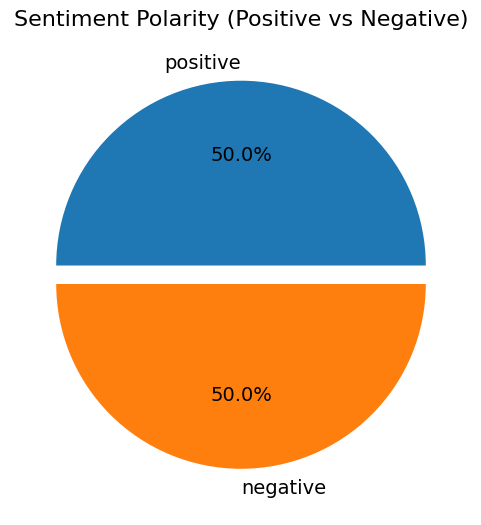

In [78]:
import matplotlib.pyplot as plt

# Filter data hanya untuk positive dan negative
filtered_df = balanced_df[balanced_df['polarity'].isin(['positive', 'negative'])]

# Tentukan label yang diinginkan (tanpa neutral)
labels = ['positive', 'negative']

# Hitung jumlah masing-masing sentimen
sizes = [filtered_df['polarity'].value_counts().get(label, 0) for label in labels]

# Buat pie chart
fig, ax = plt.subplots(figsize=(6, 6))
explode = (0.1, 0)  # Hanya explode untuk 'positive'

ax.pie(
    x=sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    textprops={'fontsize': 14}
)

ax.set_title('Sentiment Polarity (Positive vs Negative)', fontsize=16, pad=20)
plt.show()


In [81]:
# Apply the sentiment analysis function to get score and polarity
clean_df[['polarity_score', 'polarity']] = clean_df['text_stopword'].apply(lambda x: pd.Series(sentiment_analysis_lexicon_indonesia(x)))

# Filter data only for positive and negative sentiments
filtered_df = clean_df[clean_df['polarity'].isin(['positive', 'negative'])].copy()

# Now perform oversampling on the filtered data
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Siapkan data untuk oversampling
# Use text_stopword for X as the sentiment function processes word lists
X = filtered_df[['text_stopword']]
y = filtered_df['polarity']         # Label target

# Konversi ke bentuk numerik dulu agar bisa diproses oleh RandomOverSampler
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Terapkan oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Gabungkan kembali hasilnya ke dalam DataFrame
# Merge with the original filtered_df to keep all relevant columns
balanced_df = pd.merge(X_resampled, filtered_df, left_index=True, right_index=True, how='left', suffixes=('_resampled', ''))
balanced_df['polarity'] = y_resampled

# Drop the duplicated text_stopword column if it exists from the merge
if 'text_stopword_resampled' in balanced_df.columns:
    balanced_df = balanced_df.drop(columns=['text_stopword_resampled'])


# Cek jumlah data tiap kelas setelah oversampling
print(balanced_df['polarity'].value_counts())

polarity
positive    922
negative    922
Name: count, dtype: int64


In [82]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [83]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas neutral.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'neutral_tweets' berdasarkan 'polarity_score' (bisa ascending atau descending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True) # or ascending=False

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_tweets = neutral_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

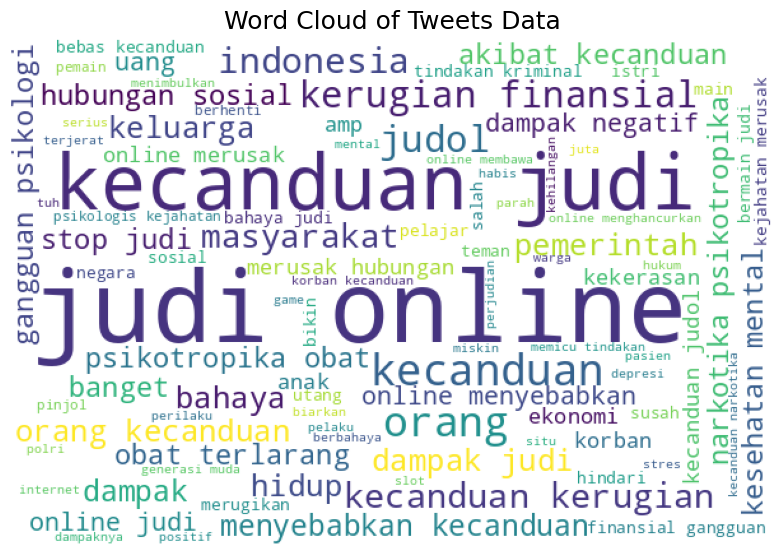

In [84]:
# Membuat list kosong untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = []

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Menambahkan semua kata dalam tweet ke dalam list.
    list_words.extend(tweet)

# Menggabungkan semua kata dalam 'list_words' menjadi satu string.
list_words_str = ' '.join(list_words)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words_str)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud)

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

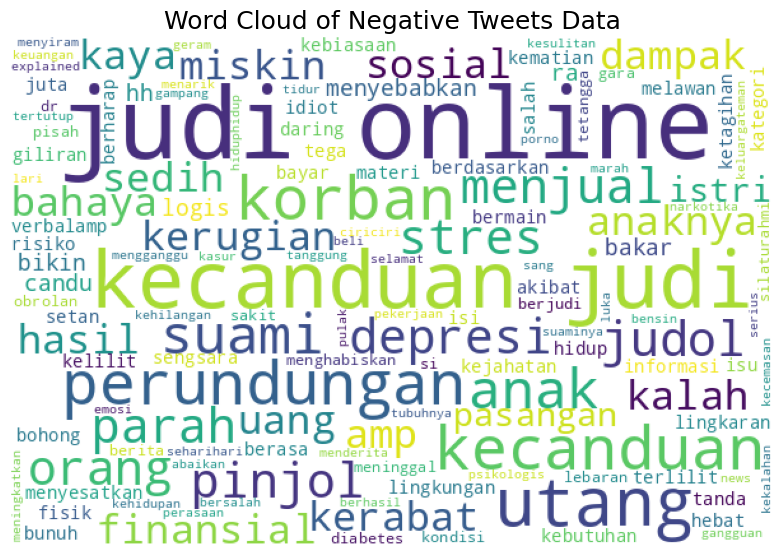

In [85]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()


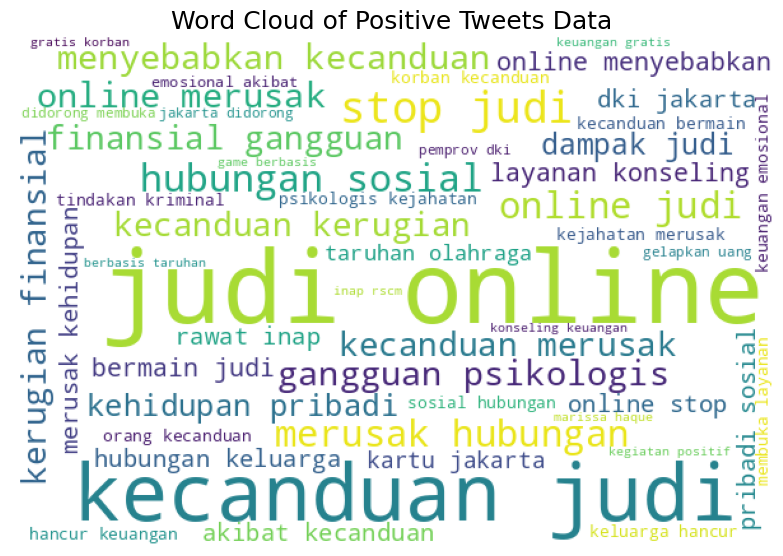

In [86]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

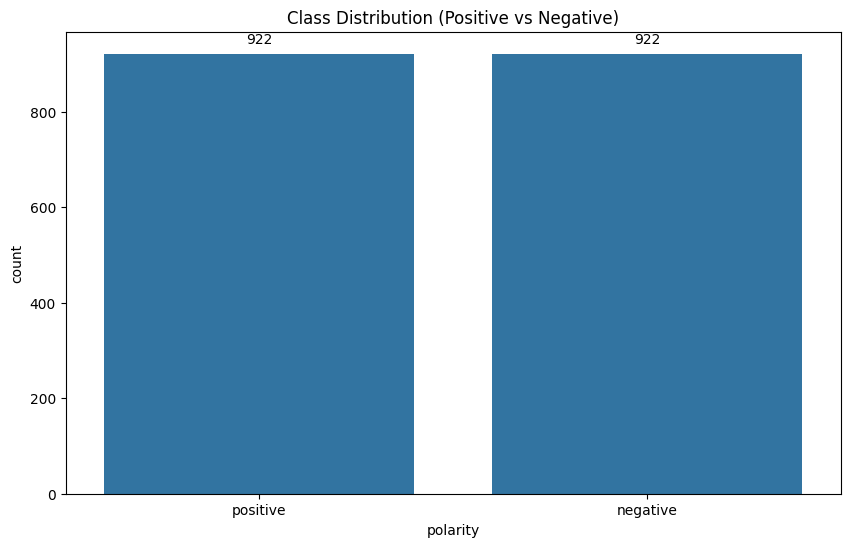

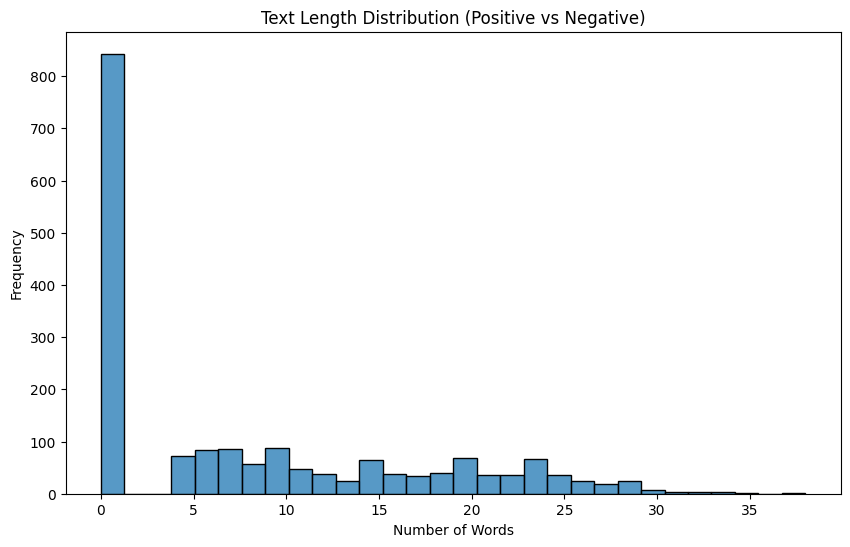

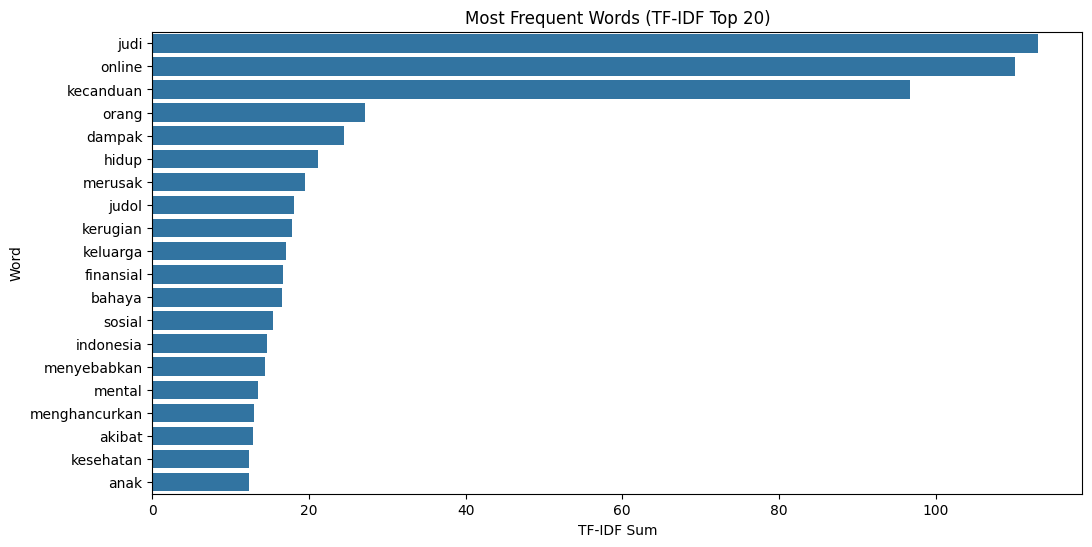

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd # Ensure pandas is imported

# Filter hanya positive dan negative dari balanced_df
filtered_df = balanced_df[balanced_df['polarity'].isin(['positive', 'negative'])].copy()

# Tambahkan langkah ini untuk menangani NaN di kolom 'text_akhir'
# Ganti np.nan dengan string kosong ''
filtered_df['text_akhir'] = filtered_df['text_akhir'].fillna('')

# ======================
# Visualisasi Distribusi Kelas
# ======================
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=filtered_df)
plt.title('Class Distribution (Positive vs Negative)')

# Tambahkan jumlah di atas tiap batang
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')
plt.show()

# ======================
# Distribusi Panjang Teks
# ======================
plt.figure(figsize=(10, 6))
# Pastikan kolom 'text_akhir' berisi string sebelum menghitung panjangnya
filtered_df['text_length'] = filtered_df['text_akhir'].apply(lambda x: len(str(x).split()))
sns.histplot(filtered_df['text_length'], bins=30)
plt.title('Text Length Distribution (Positive vs Negative)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# ======================
# Visualisasi Kata yang Paling Sering Muncul (TF-IDF)
# ======================
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
# Gunakan kolom 'text_akhir' yang sudah diisi NaN
X_tfidf = vectorizer.fit_transform(filtered_df['text_akhir'])

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df.columns = ['kata', 'jumlah']
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='kata', data=tfidf_df)
plt.title('Most Frequent Words (TF-IDF Top 20)')
plt.xlabel('TF-IDF Sum')
plt.ylabel('Word')
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np # Import numpy for checking nan

# Filter hanya positive dan negative dari balanced_df
filtered_df = balanced_df[balanced_df['polarity'].isin(['positive', 'negative'])].copy()

# --- Start of fix ---
# Ensure 'text_akhir' is of string type and handle potential NaN values
# Convert the column to string type first
filtered_df['text_akhir'] = filtered_df['text_akhir'].astype(str)
# Then fill any remaining NaN or 'nan' string values with an empty string
filtered_df['text_akhir'] = filtered_df['text_akhir'].replace('nan', '').fillna('')
# --- End of fix ---


# Ambil teks dan label
X = filtered_df['text_akhir'].values
y = pd.get_dummies(filtered_df['polarity']).values  # Akan menghasilkan 2 kolom: positive & negative

# Tokenisasi dan Padding
tokenizer = Tokenizer(num_words=5000)
# Ensure X is a list of strings here as well, although astype(str) should handle this
tokenizer.fit_on_texts(list(X)) # Pass X as a list of strings
sequences = tokenizer.texts_to_sequences(X)
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42
)

In [94]:
# Ekstraksi fitur dengan TF-IDF (gunakan max_features yang lebih rendah untuk mempercepat)
tfidf = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.85)
X_tfidf = tfidf.fit_transform(X)

# simpan tfidf
joblib.dump(tfidf, 'tfidf.pkl')
print("TfidfVectorizer saved as 'tfidf.pkl'")

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Jika y dalam bentuk one-hot encoding, ubah ke bentuk 1D
if len(y.shape) > 1:
    y_train = y_train.argmax(axis=1)
    y_test = y_test.argmax(axis=1)

param_dist = {
    'C': uniform(0.01, 10),  # Rentang nilai C secara acak
    'solver': ['liblinear', 'saga'],  # Solver yang berbeda
    'max_iter': [100, 1000]  # Jumlah iterasi
}

# Menerapkan RandomizedSearchCV
randomized_search = RandomizedSearchCV(LogisticRegression(), param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=1, random_state=42)

# Melatih model dengan RandomizedSearchCV
randomized_search.fit(X_train.toarray(), y_train)

# Mencetak parameter terbaik dari RandomizedSearchCV
print("Best Parameters from RandomizedSearch:", randomized_search.best_params_)

# Menggunakan parameter terbaik dari RandomizedSearchCV
best_model_randomized = randomized_search.best_estimator_

# Simpan model terbaik ke dalam file
joblib.dump(best_model_randomized, 'best_logistic_model.pkl')
print("Model saved as 'best_logistic_model.pkl'")

# Prediksi sentimen pada data pelatihan dan data uji menggunakan RandomizedSearchCV
y_pred_train_lr_randomized = best_model_randomized.predict(X_train.toarray())
y_pred_test_lr_randomized = best_model_randomized.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression dengan RandomizedSearchCV
accuracy_train_lr_randomized = accuracy_score(y_pred_train_lr_randomized, y_train)
accuracy_test_lr_randomized = accuracy_score(y_pred_test_lr_randomized, y_test)

# Menampilkan akurasi
print('RandomizedSearchCV - accuracy_train:', accuracy_train_lr_randomized)
print('RandomizedSearchCV - accuracy_test:', accuracy_test_lr_randomized)


TfidfVectorizer saved as 'tfidf.pkl'
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from RandomizedSearch: {'C': np.float64(0.21584494295802448), 'max_iter': 1000, 'solver': 'saga'}
Model saved as 'best_logistic_model.pkl'
RandomizedSearchCV - accuracy_train: 0.6798449612403101
RandomizedSearchCV - accuracy_test: 0.5703971119133574


In [98]:
# Mapping jika model menghasilkan angka (hanya 2 kelas)
label_sentimen = {
    0: "NEGATIF",
    1: "POSITIF"
}

# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Preprocessing teks
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Transformasi menggunakan TF-IDF (pastikan tfidf sudah fit pada data training)
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Prediksi sentimen
prediksi = best_model_randomized.predict(X_kalimat_baru)[0]

# Cek apakah hasil prediksi angka atau string
if isinstance(prediksi, str):
    hasil = prediksi.upper()
else:
    hasil = label_sentimen.get(prediksi, "TIDAK DIKENAL")

# Tampilkan hasil
print(f"Sentimen kalimat baru adalah {hasil}.")


Masukkan kalimat baru: Judi itu menghancurkan moral & merusak generasi muda kita, baik judi offline maupun online.
Sentimen kalimat baru adalah NEGATIF.
